In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data import load_training_data, load_test_data, split_data
import networkx as nx
import time, datetime
from utils import plot_graph

In [2]:
graphs, labels =  load_training_data()
submi_graphs = load_test_data()

# Test of graph product

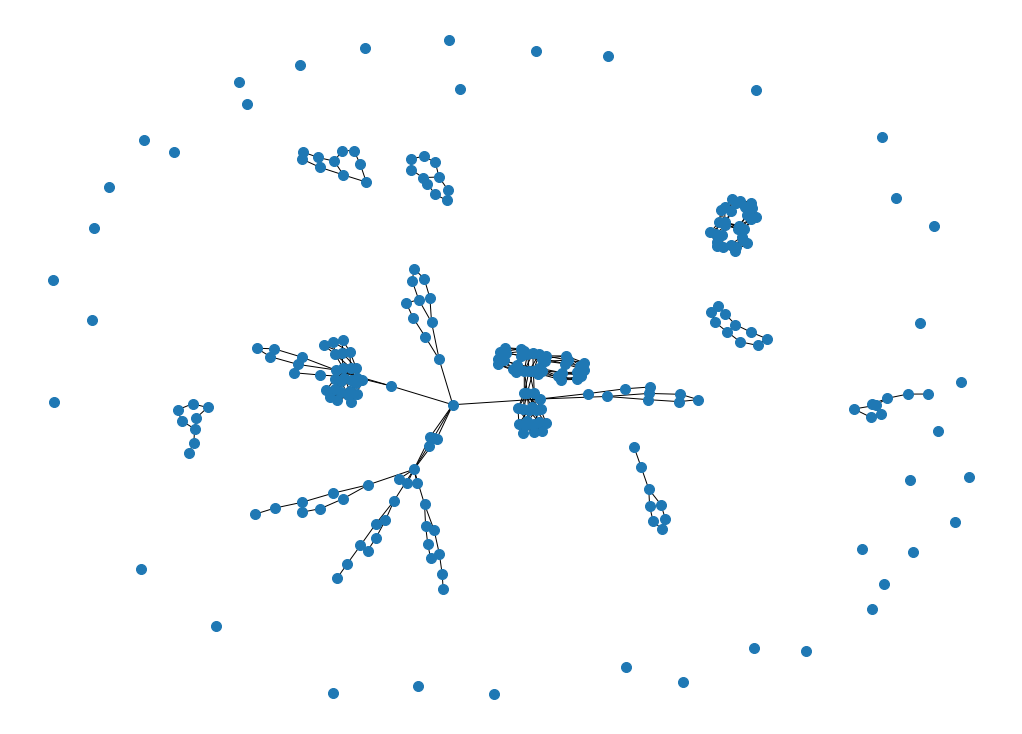

In [30]:
from n_walk import product_graph, graph_product, graph_product_el

g1, g2 = graphs[:2]
plt.figure(figsize=(14, 10))
gp = product_graph(g1, g2)
nx.draw(gp, node_size = 100)

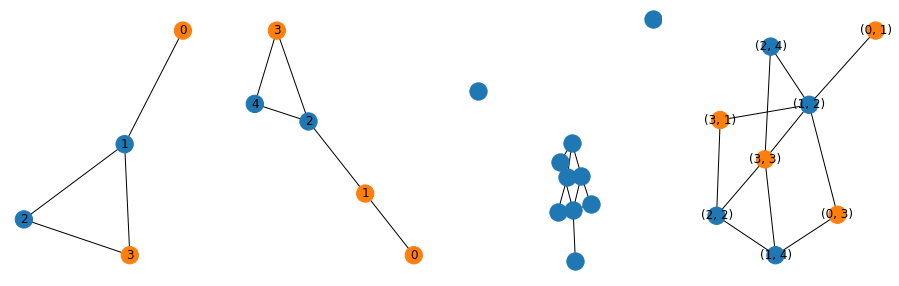

In [45]:
ga = nx.Graph([(0, 1), (1, 2), (1, 3), (2, 3)])
for v, l in zip(range(4), [0, 1, 1, 0]) : ga.nodes[v]["labels"] = [l]
gb = nx.Graph([(0, 1), (1, 2), (2, 3), (3, 4), (4, 2)])
for v, l in zip(range(5), [0, 0, 1, 0, 1]) : gb.nodes[v]["labels"] = [l]

plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 1)
plot_graph(ga)
plt.subplot(1, 5, 2)
plot_graph(gb)
plt.subplot(1, 5, 3)
nx.draw(test_product_graph(ga, gb))
plt.subplot(1, 5, 4)
plot_graph(graph_product(ga, gb, with_lonely_nodes=False))

# Test product graph speed

In [19]:
np.random.seed(42)
g1_indices = np.random.choice(len(graphs), 6000, replace=True)
g2_indices = np.random.choice(len(graphs), 6000, replace=True)

def convert_time(seconds_tot):
    seconds = int(seconds_tot%60)
    minutes_tot = int(seconds_tot//60)
    if minutes_tot == 0: return f"{seconds}s"
    minutes = minutes_tot%60
    hours = int(minutes_tot//60)
    if hours == 0: return f"{minutes}m {seconds}s"
    return f"{hours}h {minutes}m {seconds}s"


def test_speed_one_graph(f, *args, **kwargs):
    n_in, n_out = 100, 60
    times_list = []
    for i in range(n_out):
        t0 = time.time()
        for j in range(n_in):
            g = graphs[g1_indices[i*n_in + j]]
            f(g, *args, **kwargs)
        t1 = time.time()
        times_list.append(t1 - t0)
    times_full = np.array(times_list)/n_in * (6000*6001)/2 #time to compute the whole gram matrix
    print(convert_time(times_full.mean()), ", ", convert_time(times_full.std()))
    return times_full

def test_speed_two_graphs(f, *args, **kwargs):
    n_in, n_out = 100, 60
    times_list = []
    for i in range(n_out):
        t0 = time.time()
        for j in range(n_in):
            g1 = graphs[g1_indices[i*n_in + j]]
            g2 = graphs[g2_indices[i*n_in + j]]
            f(g1, g2, *args, **kwargs)
        t1 = time.time()
        times_list.append(t1 - t0)
    times_full = np.array(times_list)/n_in * (6000*6001)/2 #time to compute the whole gram matrix
    print(convert_time(times_full.mean()), ", ", convert_time(times_full.std()))
    return times_full

In [20]:
from n_walk import product_graph, graph_product, graph_product_el
d = test_speed_two_graphs(product_graph)

19h 53m 43s ,  4h 4m 1s


In [21]:
d = test_speed_two_graphs(graph_product)

7h 57m 43s ,  2h 39m 12s


In [22]:
d = test_speed_two_graphs(graph_product, with_lonely_nodes=False)

5h 53m 40s ,  59m 27s


In [23]:
d = test_speed_two_graphs(graph_product_el)

8h 9m 12s ,  2h 54m 24s


In [24]:
d = test_speed_two_graphs(graph_product_el, with_lonely_nodes=False)

4h 41m 6s ,  1h 14m 44s


# Test of kernels

In [3]:
from kernel_class import RandomWalkKernel

sub_graphs, sub_labels = split_data(graphs, labels)[0]

rwk = RandomWalkKernel(0.95, False)
ker = rwk.compute_gram_matrix(sub_graphs[:200])

100%|██████████| 200/200 [09:52<00:00,  2.96s/it]


In [14]:
np.where(ker ==ker.min())

(array([30, 39], dtype=int64), array([39, 30], dtype=int64))

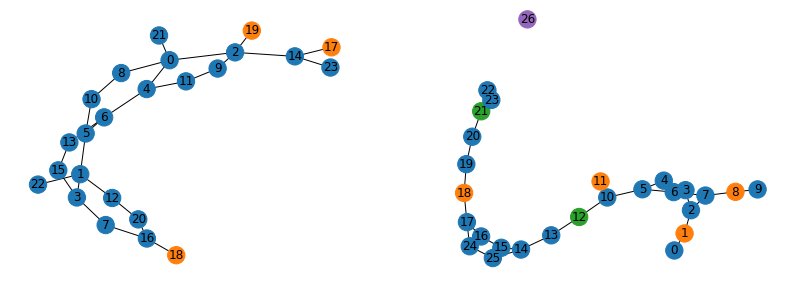

In [16]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plot_graph(sub_graphs[30])
plt.subplot(1, 2, 2)
plot_graph(sub_graphs[39])